In [52]:
#importing dependencies
import numpy as np 
import pandas as pd 
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [53]:
#Loading Data 
wineq_df = pd.read_csv('/content/winequality-red.csv')

In [54]:
wineq_df.shape

(1599, 12)

In [55]:
wineq_df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [56]:
wineq_df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [57]:
wineq_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [58]:
wineq_df['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

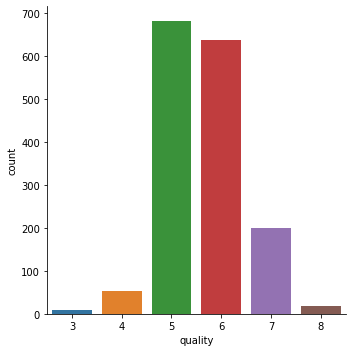

In [59]:
sns.catplot(x='quality',data = wineq_df,kind='count')

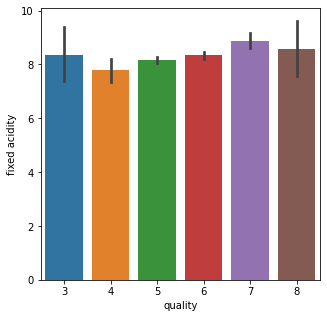

In [60]:
#fixed acidity and Quality 
plot = plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = "fixed acidity", data = wineq_df)

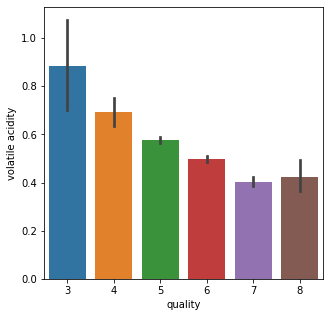

In [61]:
#volatile acidity and Quality 
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = "volatile acidity", data = wineq_df)

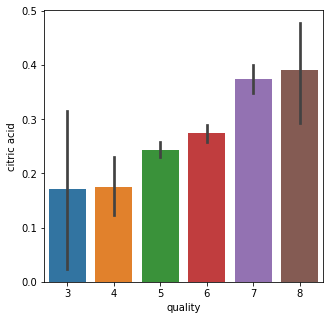

In [62]:
#critic acidity and quality 
plt.figure(figsize=(5,5))
sns.barplot(x = 'quality', y = "citric acid", data = wineq_df)

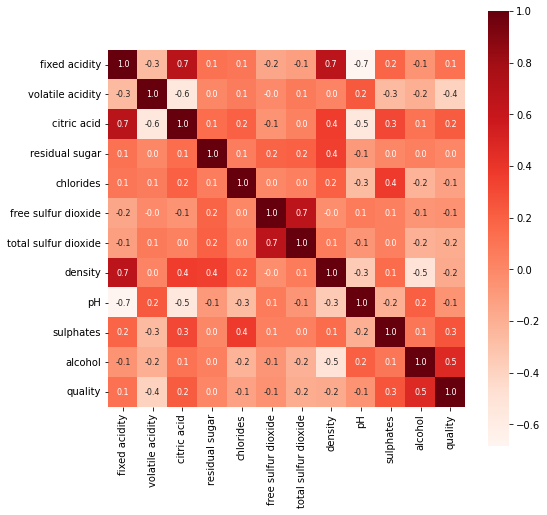

In [63]:
#Correlation
corr = wineq_df.corr()
plt.figure(figsize = (8,8))
sns.heatmap(corr,cbar = True , square = True , fmt = '.1f' , annot =True , annot_kws ={'size':8} , cmap='Reds')

In [64]:
wineq_df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [65]:
#Data preprocess 
X = wineq_df.drop(columns=['residual sugar', 'quality'],axis=1)

In [66]:
 #Label Transformation to : 'Good' : 1 or 'Bad' : 0
Y = wineq_df['quality'].apply(lambda y_value : 1 if y_value >=7 else 0)

In [67]:
Y.value_counts()

0    1382
1     217
Name: quality, dtype: int64

In [68]:
#Split into train and test Data 
X_train, X_test , Y_train , Y_test = train_test_split(X,Y,test_size = .2 , stratify = Y , random_state=2)

In [69]:
#Model Declaration
model = RandomForestClassifier()

In [70]:
model.fit(X_train,Y_train)

RandomForestClassifier()

In [71]:
#Accuracy Score on Training Data 
predictions_train =model.predict(X_train ) 
print('Accuracy Score on Training Data : ', accuracy_score(predictions_train,Y_train))

Accuracy Score on Training Data :  1.0


In [72]:
#Accuracy Score on Test Data 
predictions_test =model.predict(X_test) 
print('Accuracy Score on Training Data : ', accuracy_score(predictions_test,Y_test))

Accuracy Score on Training Data :  0.9375


In [79]:
#Build the prediction sysytem 
# input_data = (11.2,0.28,0.56,0.075,17.0,60.0,0.998,3.16,0.58,9.8) # Suppose to be Bad
input_data = (7.3,0.65,0.0,0.065,15.0,21.0,0.9946,3.39,0.47,10.0) #Suppose to be GOOD
input_data = np.asarray(input_data)
input_data_reshaped = input_data.reshape(1,-1)

prediction = model.predict(input_data_reshaped)

if prediction[0]== 1 : 
  print('This wine is Good')
else : 
  print('This wine is Bad')

This wine is Good


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
